In [8]:
import  numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [3]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [4]:
random_seed = 42
sample_train = train.sample(frac = 0.1, random_state=random_seed)

sample_train.to_csv('dataset/sample_train.csv',index=False)

In [7]:
print(sample_train.shape)
print(train.shape)

(224970, 6)
(2249698, 6)


In [11]:
sample_train.info

<bound method DataFrame.info of          PRODUCT_ID                                              TITLE   
90943        659984                    Calendrier sacre maya 2005-2006  \
1001689      433902                                  Fractured Reality   
536614      1499195  The Golden Butterfly the most daring illusion ...   
369746      2641984  10x30 Contemporary Bronze Complete Wood Panora...   
175997       154989  Quality By Experimental Design, 3rd Edition (Q...   
...             ...                                                ...   
1106248     1501016  Prime-Line 9087768 Finished Hex Nuts, Class 8 ...   
717723       655011                        Les petits pas des gazelles   
689159       100281                            Water, Water Everywhere   
1381952     2567429  WorldCare® BT70 Car FM Transmitter Bluetooth P...   
792888      2352247              Puma Boy's Casual (58933722 + 104_Red   

                                             BULLET_POINTS   
90943            

In [12]:
sample_train.columns[sample_train.isnull().any()]

Index(['BULLET_POINTS', 'DESCRIPTION'], dtype='object')

In [49]:
miss = sample_train.isnull().sum()/len(sample_train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [50]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()

ValueError: min() arg is an empty sequence

In [53]:
train.isnull().any().sum()

3

Skewness is -0.43435537275783437


C:\Users\Kanna\AppData\Local\Temp\ipykernel_19696\971320057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='PRODUCT_LENGTH', ylabel='Density'>

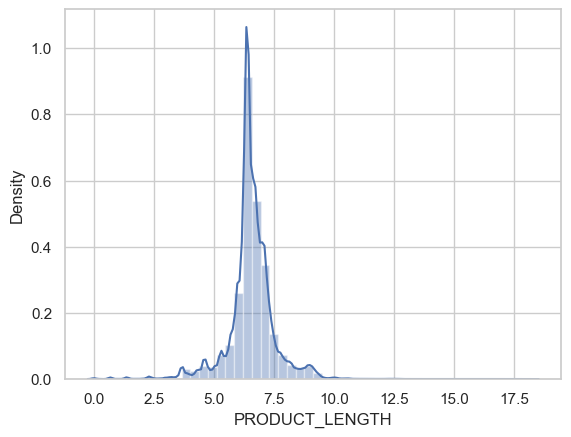

In [17]:
target = np.log(sample_train['PRODUCT_LENGTH'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [22]:
sample_train.fillna('null', inplace =True)

In [33]:

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Define a function to preprocess the text data
def preprocess_text(text):
    # Remove punctuations, numbers, and special characters
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = [word for word in word_tokens if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    # Join the list of words into a single string
    text = ' '.join(text)
    return text

# Apply the preprocess_text function to the product title column
sample_train['DESCRIPTION'] = sample_train['DESCRIPTION'].apply(preprocess_text)

sample_train['BULLET_POINTS'] = sample_train['BULLET_POINTS'].apply(preprocess_text)

sample_train['TITLE'] = sample_train['TITLE'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
sample_train.to_csv('dataset/sample_train.csv', index = False)

In [35]:
sample_train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
90943,659984,calendri sacr maya 20052006,null,null,1,492.125984
1001689,433902,fractur realiti,null,null,114,500.000000
536614,1499195,golden butterfli dare illus age performend har...,golden butterfli dare illus age performend har...,null,8501,2.000000
369746,2641984,10x30 contemporari bronz complet wood panoram ...,11088 complet wood pictur frame bronz finish m...,complet wood pictur frame made display photo a...,12228,3150.000000
175997,154989,qualiti experiment design 3rd edit qualiti rel...,null,null,6320,700.000000


In [24]:
sample_train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
90943,659984,Calendrier sacre maya 2005-2006,null,null,1,492.125984
1001689,433902,Fractured Reality,null,null,114,500.000000
536614,1499195,The Golden Butterfly the most daring illusion ...,The Golden Butterfly the most daring illusion ...,null,8501,2.000000
369746,2641984,10x30 Contemporary Bronze Complete Wood Panora...,[&#11088; COMPLETE WOOD PICTURE FRAME: Bronze ...,complet wood pictur frame made display photo a...,12228,3150.000000
175997,154989,"Quality By Experimental Design, 3rd Edition (Q...",null,null,6320,700.000000


In [56]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_and_visualize(df, column):
    # Create a CountVectorizer object
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)

    # Fit and transform the text data
    X = vectorizer.fit_transform(df[column].values.astype('U'))

    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()

    # Convert the feature matrix to a DataFrame
    word_counts = pd.DataFrame(X.toarray(), columns=feature_names)

    # Get the sum of word counts for each feature and sort in descending order
    top_words = word_counts.sum().sort_values(ascending=False)

    # Generate a word cloud using the top 100 most frequent words
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(top_words)

    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

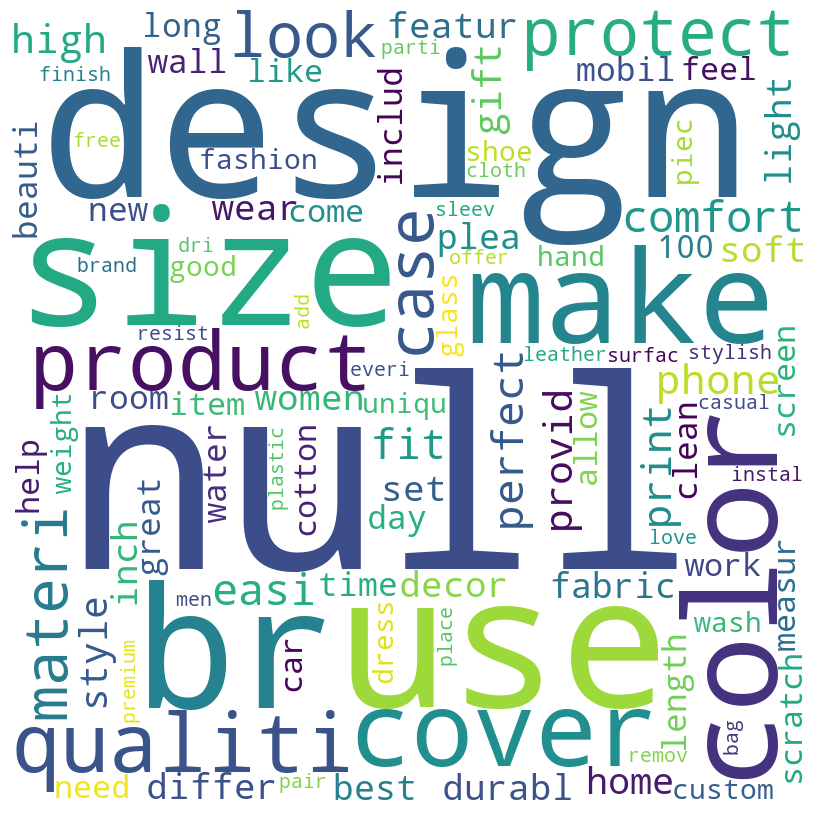

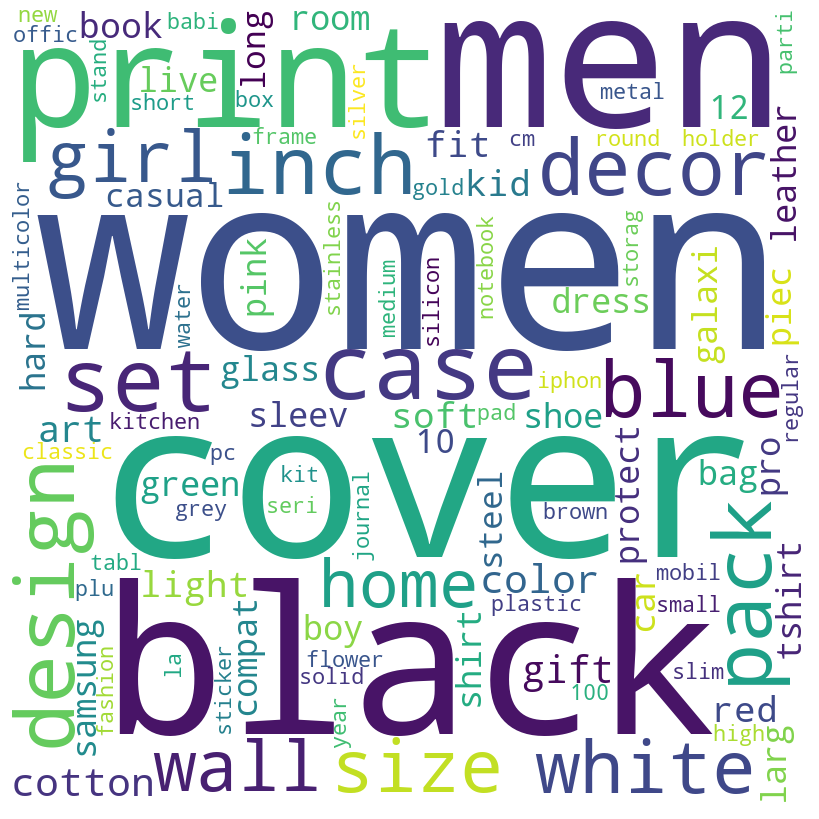

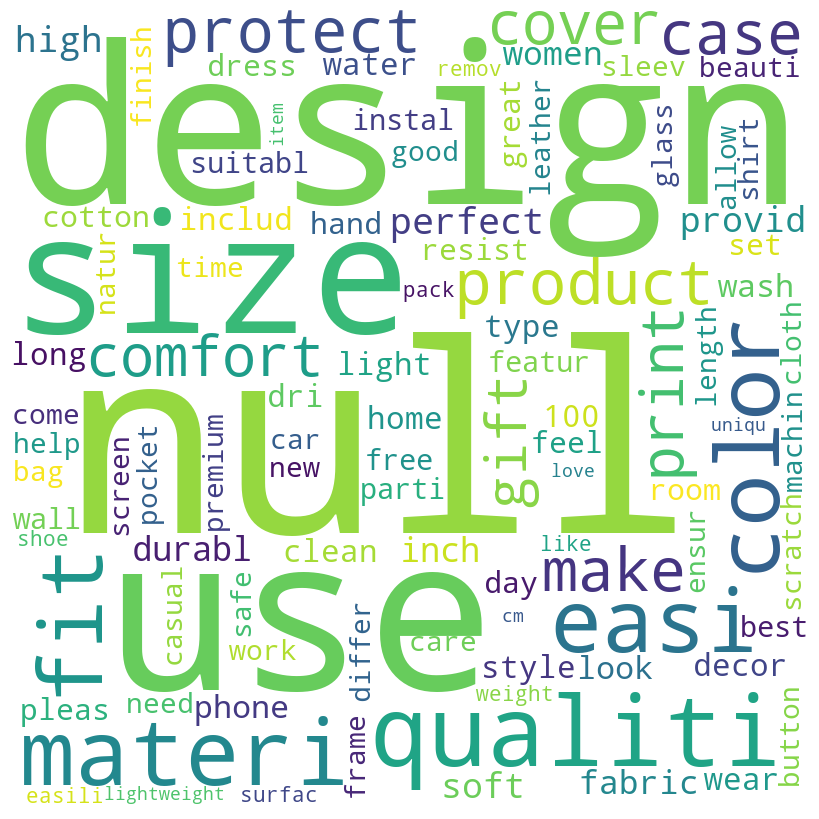

In [57]:
vectorize_and_visualize(sample_train, 'DESCRIPTION')
vectorize_and_visualize(sample_train, 'TITLE')
vectorize_and_visualize(sample_train, 'BULLET_POINTS')